# Scale data 

# Step 1 :Library & Data Import


In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(r'C:\Users\suvar\Desktop\KNN\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  Step 2 : Data Pre-Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Bad Rate Analysis 

In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Step 3 : Data Partition

In [4]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = data.drop(['Outcome'],axis=1)
train_y = data['Outcome']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=20)

In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
416,1,97,68,21,0,27.2,1.095,22
373,2,105,58,40,94,34.9,0.225,25
166,3,148,66,25,0,32.5,0.256,22
685,2,129,74,26,205,33.2,0.591,25
156,2,99,52,15,94,24.6,0.637,21


#  Step 4 : Scaling Data

In [7]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train[0:5]

array([[-0.87092798, -0.78067801, -0.06195459,  0.04464946, -0.69184904,
        -0.59124626,  1.88924953, -0.95045485],
       [-0.57093547, -0.52614001, -0.60915219,  1.24983051,  0.10619387,
         0.42376004, -0.74988816, -0.69703169],
       [-0.27094296,  0.84200176, -0.17139411,  0.29837179, -0.69184904,
         0.10739444, -0.65584992, -0.95045485],
       [-0.57093547,  0.237474  ,  0.26636397,  0.36180237,  1.04856369,
         0.19966774,  0.36036976, -0.69703169],
       [-0.57093547, -0.71704351, -0.93747075, -0.33593403,  0.10619387,
        -0.93397566,  0.49991038, -1.03492924]])

In [9]:
X_train.mean(axis=0)

array([ 3.30792708e-18, -1.45548791e-16, -3.88681431e-17, -2.64634166e-17,
       -6.61585415e-17, -2.97713437e-17, -1.65396354e-18,  2.64634166e-16])

In [10]:
 X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

# Step 5 : Model Building 


In [11]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=6)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

# Step 6 : Predictions on Train Dataset


In [13]:
X_train=pd.DataFrame(X_train,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.870928,-0.780678,-0.061955,0.044649,-0.691849,-0.591246,1.889250,-0.950455
1,-0.570935,-0.526140,-0.609152,1.249831,0.106194,0.423760,-0.749888,-0.697032
2,-0.270943,0.842002,-0.171394,0.298372,-0.691849,0.107394,-0.655850,-0.950455
3,-0.570935,0.237474,0.266364,0.361802,1.048564,0.199668,0.360370,-0.697032
4,-0.570935,-0.717044,-0.937471,-0.335934,0.106194,-0.933976,0.499910,-1.034929


In [14]:
y_train.reset_index(drop=True, inplace=True)

In [15]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.870928,-0.780678,-0.061955,0.044649,-0.691849,-0.591246,1.889250,-0.950455,0
1,-0.570935,-0.526140,-0.609152,1.249831,0.106194,0.423760,-0.749888,-0.697032,0
2,-0.270943,0.842002,-0.171394,0.298372,-0.691849,0.107394,-0.655850,-0.950455,0
3,-0.570935,0.237474,0.266364,0.361802,1.048564,0.199668,0.360370,-0.697032,0
4,-0.570935,-0.717044,-0.937471,-0.335934,0.106194,-0.933976,0.499910,-1.034929,0


In [16]:
train['Predicted']=model.predict(X_train)
train.head()

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
0,-0.870928,-0.780678,-0.061955,0.044649,-0.691849,-0.591246,1.889250,-0.950455,0,0
1,-0.570935,-0.526140,-0.609152,1.249831,0.106194,0.423760,-0.749888,-0.697032,0,0
2,-0.270943,0.842002,-0.171394,0.298372,-0.691849,0.107394,-0.655850,-0.950455,0,0
3,-0.570935,0.237474,0.266364,0.361802,1.048564,0.199668,0.360370,-0.697032,0,0
4,-0.570935,-0.717044,-0.937471,-0.335934,0.106194,-0.933976,0.499910,-1.034929,0,0


# Step 7 : Model Performance Metrics

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Outcome'],train['Predicted'])
print(confusion_matrix)

[[319  28]
 [ 84 106]]


In [18]:
Accuracy_Train=((319+106)/(537)*100)
print(Accuracy_Train)

79.14338919925513


In [19]:
from sklearn.metrics import classification_report
print(classification_report(train['Outcome'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       347
           1       0.79      0.56      0.65       190

    accuracy                           0.79       537
   macro avg       0.79      0.74      0.75       537
weighted avg       0.79      0.79      0.78       537



# Step 8 : Predictions on Test Dataset

In [20]:
X_test=pd.DataFrame(X_test,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.829005,-0.430688,-0.171394,-1.287393,-0.691849,0.094213,-0.607314,0.739033
1,0.329042,1.414712,0.156924,-0.082212,0.793869,-0.775793,0.348236,1.499302
2,-0.270943,-0.812495,0.485243,1.186400,-0.691849,0.740126,-0.710453,0.570084
3,1.229020,-0.367054,0.375803,-1.287393,-0.691849,-0.512155,-0.713486,2.090623
4,-1.170920,0.142022,0.923001,0.425233,0.326929,-0.564882,0.129824,-1.034929


In [21]:
y_test.reset_index(drop=True, inplace=True)

In [22]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.829005,-0.430688,-0.171394,-1.287393,-0.691849,0.094213,-0.607314,0.739033,1
1,0.329042,1.414712,0.156924,-0.082212,0.793869,-0.775793,0.348236,1.499302,1
2,-0.270943,-0.812495,0.485243,1.186400,-0.691849,0.740126,-0.710453,0.570084,0
3,1.229020,-0.367054,0.375803,-1.287393,-0.691849,-0.512155,-0.713486,2.090623,0
4,-1.170920,0.142022,0.923001,0.425233,0.326929,-0.564882,0.129824,-1.034929,0


In [23]:
test['Predicted']=model.predict(X_test)
test.head()

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
0,1.829005,-0.430688,-0.171394,-1.287393,-0.691849,0.094213,-0.607314,0.739033,1,0
1,0.329042,1.414712,0.156924,-0.082212,0.793869,-0.775793,0.348236,1.499302,1,0
2,-0.270943,-0.812495,0.485243,1.186400,-0.691849,0.740126,-0.710453,0.570084,0,0
3,1.229020,-0.367054,0.375803,-1.287393,-0.691849,-0.512155,-0.713486,2.090623,0,0
4,-1.170920,0.142022,0.923001,0.425233,0.326929,-0.564882,0.129824,-1.034929,0,0


# Step 9 : Model Performance Metrics on Test data 

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Outcome'],test['Predicted'])
print(confusion_matrix)

[[133  20]
 [ 41  37]]


In [25]:
Accuracy_test=((133+37)/(231)*100)
Accuracy_test

73.59307359307358

In [26]:
from sklearn.metrics import classification_report
print(classification_report(test['Outcome'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.65      0.47      0.55        78

    accuracy                           0.74       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



# Cross Validation Method  - Random concept

* To identify the best value of K

In [27]:
from sklearn.metrics import accuracy_score
for K in range(25):
    K_value = K+1
    model2 = KNeighborsClassifier(n_neighbors = K_value)
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0), "      ","Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0        Test Accuracy is  68.0 % for K-Value: 1
Train Accuracy is  84.0        Test Accuracy is  71.0 % for K-Value: 2
Train Accuracy is  86.0        Test Accuracy is  75.0 % for K-Value: 3
Train Accuracy is  81.0        Test Accuracy is  75.0 % for K-Value: 4
Train Accuracy is  81.0        Test Accuracy is  74.0 % for K-Value: 5
Train Accuracy is  79.0        Test Accuracy is  74.0 % for K-Value: 6
Train Accuracy is  80.0        Test Accuracy is  76.0 % for K-Value: 7
Train Accuracy is  80.0        Test Accuracy is  75.0 % for K-Value: 8
Train Accuracy is  79.0        Test Accuracy is  74.0 % for K-Value: 9
Train Accuracy is  78.0        Test Accuracy is  75.0 % for K-Value: 10
Train Accuracy is  78.0        Test Accuracy is  75.0 % for K-Value: 11
Train Accuracy is  78.0        Test Accuracy is  77.0 % for K-Value: 12
Train Accuracy is  78.0        Test Accuracy is  77.0 % for K-Value: 13
Train Accuracy is  78.0        Test Accuracy is  76.0 % for K-Value: 14


# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=8,metric='euclidean')
## Fit the model on the training data.
model.fit(X_train, y_train)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 9)}


knn2 = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn2, 
                        param_grid,
                        cv=10,
                        verbose=1)
knn_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             verbose=1)

In [30]:
knn_gscv.best_params_

{'n_neighbors': 3}

In [31]:
knn_gscv.best_score_

0.7354996505939903

# Finish

 # Unscaled

<AxesSubplot:>

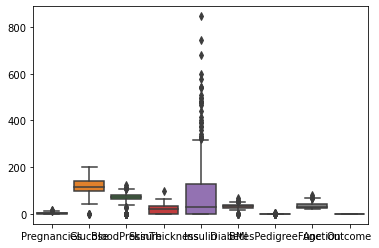

In [32]:
import seaborn as sns
sns.boxplot(data=data)


In [34]:
q1 = data['Pregnancies'].quantile(0.25)
q3 = data['Pregnancies'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

13.5

In [36]:
data['Pregnancies']=np.where(data['Pregnancies'] > upper_limit,upper_limit,data['Pregnancies']) 


<AxesSubplot:ylabel='Pregnancies'>

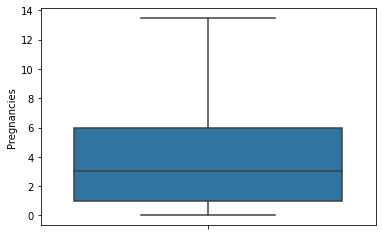

In [37]:
sns.boxplot(y='Pregnancies',data=data)  # Single Variable

<AxesSubplot:ylabel='Glucose'>

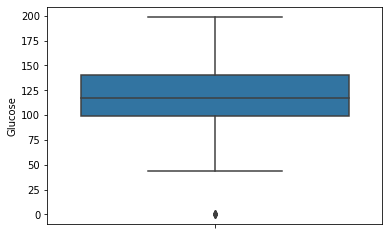

In [38]:
sns.boxplot(y=data.Glucose) 

<AxesSubplot:ylabel='Glucose'>

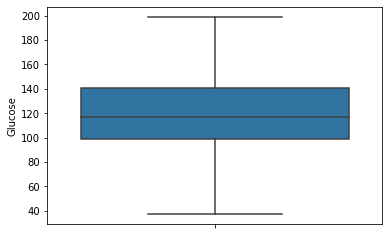

In [39]:
q1 = data['Glucose'].quantile(0.25)
q3 = data['Glucose'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
data['Glucose']=np.where(data['Glucose'] < lower_limit,lower_limit,data['Glucose']) 
sns.boxplot(y='Glucose',data=data)  # Single Variable

<AxesSubplot:ylabel='BloodPressure'>

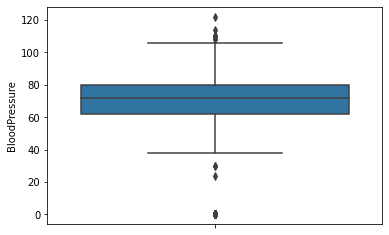

In [40]:
sns.boxplot(y=data.BloodPressure)  # Single Variable

<AxesSubplot:ylabel='BloodPressure'>

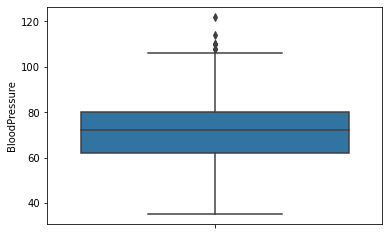

In [41]:
q1 = data['BloodPressure'].quantile(0.25)
q3 = data['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
data['BloodPressure']=np.where(data['BloodPressure'] < lower_limit,lower_limit,data['BloodPressure']) 
sns.boxplot(y='BloodPressure',data=data)  # Single Variable

<AxesSubplot:ylabel='BloodPressure'>

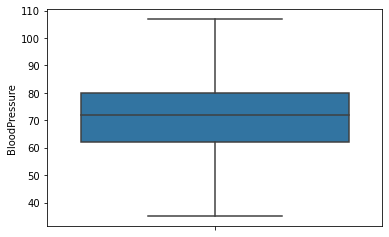

In [42]:
q1 = data['BloodPressure'].quantile(0.25)
q3 = data['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['BloodPressure']=np.where(data['BloodPressure'] > upper_limit,upper_limit,data['BloodPressure']) 
sns.boxplot(y='BloodPressure',data=data)  # Single Variable

<AxesSubplot:ylabel='SkinThickness'>

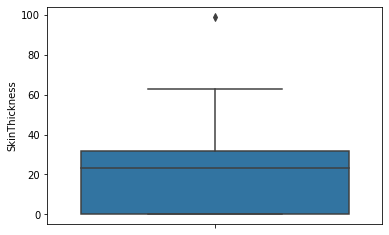

In [43]:
sns.boxplot(y=data.SkinThickness)  # Single Variable

<AxesSubplot:ylabel='SkinThickness'>

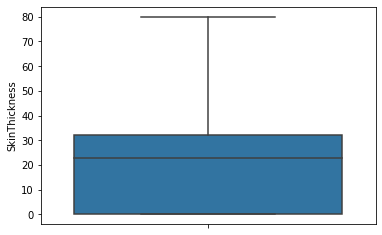

In [44]:
q1 = data['SkinThickness'].quantile(0.25)
q3 = data['SkinThickness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['SkinThickness']=np.where(data['SkinThickness'] > upper_limit,upper_limit,data['SkinThickness']) 
sns.boxplot(y='SkinThickness',data=data)  # Single Variable

<AxesSubplot:ylabel='Insulin'>

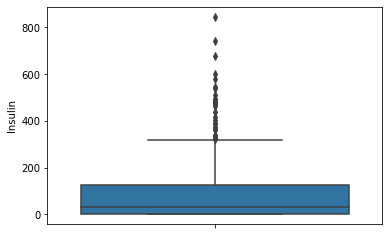

In [45]:
sns.boxplot(y=data.Insulin)  # Single Variable

<AxesSubplot:ylabel='Insulin'>

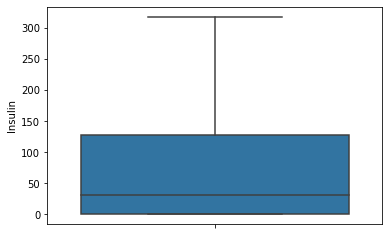

In [46]:
q1 = data['Insulin'].quantile(0.25)
q3 = data['Insulin'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['Insulin']=np.where(data['Insulin'] > upper_limit,upper_limit,data['Insulin']) 
sns.boxplot(y='Insulin',data=data)  # Single Variable

<AxesSubplot:ylabel='BMI'>

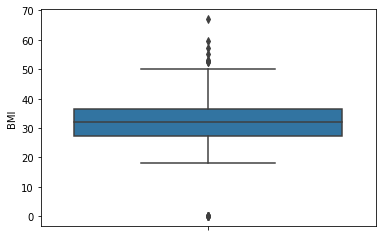

In [47]:
sns.boxplot(y=data.BMI)  # Single Variable

<AxesSubplot:ylabel='BMI'>

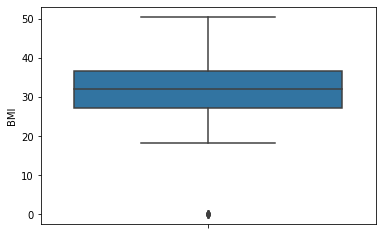

In [48]:
q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['BMI']=np.where(data['BMI'] > upper_limit,upper_limit,data['BMI']) 
sns.boxplot(y='BMI',data=data)  # Single Variable

<AxesSubplot:ylabel='BMI'>

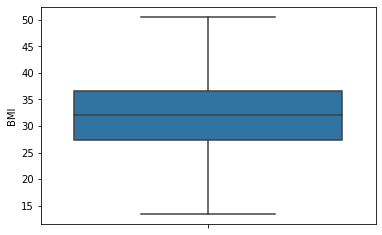

In [49]:
q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
data['BMI']=np.where(data['BMI'] < lower_limit,lower_limit,data['BMI']) 
sns.boxplot(y='BMI',data=data)  # Single Variable

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

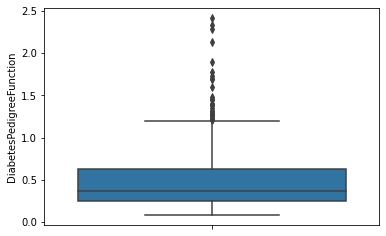

In [50]:
sns.boxplot(y=data.DiabetesPedigreeFunction)  # Single Variable

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

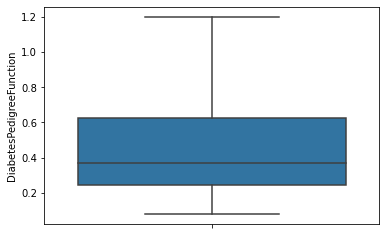

In [51]:
q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['DiabetesPedigreeFunction']=np.where(data['DiabetesPedigreeFunction'] > upper_limit,upper_limit,data['DiabetesPedigreeFunction']) 
sns.boxplot(y='DiabetesPedigreeFunction',data=data)  # Single Variable

<AxesSubplot:ylabel='Age'>

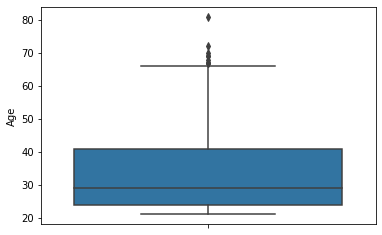

In [52]:
sns.boxplot(y=data.Age)  # Single Variable

<AxesSubplot:ylabel='Age'>

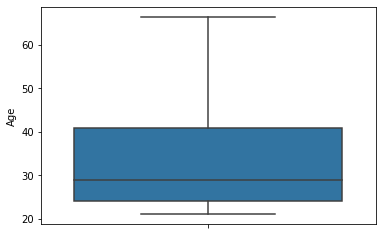

In [53]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['Age']=np.where(data['Age'] > upper_limit,upper_limit,data['Age']) 
sns.boxplot(y='Age',data=data)  # Single Variable

<AxesSubplot:ylabel='Outcome'>

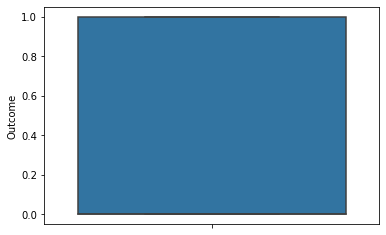

In [54]:
sns.boxplot(y=data.Outcome)  # Single Variable

# Step 3 : Data Partition

In [55]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = data.drop(['Outcome'],axis=1)
train_y = data['Outcome']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x, train_y, test_size=0.3,random_state=20)

# Step 4 : Model Building 


In [56]:
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=7)  

# randomly taken k =  4 
# taken  k = sqrt(n)

## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# Step 5 : Predictions on Train Dataset

In [57]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
416,1.0,97.0,68.0,21.0,0.0,27.2,1.095,22.0,0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0,0
166,3.0,148.0,66.0,25.0,0.0,32.5,0.256,22.0,0
685,2.0,129.0,74.0,26.0,205.0,33.2,0.591,25.0,0
156,2.0,99.0,52.0,15.0,94.0,24.6,0.637,21.0,0


In [58]:
train['Predicted']=model.predict(X_train)
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
416,1.0,97.0,68.0,21.0,0.0,27.2,1.095,22.0,0,0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0,0,0
166,3.0,148.0,66.0,25.0,0.0,32.5,0.256,22.0,0,0
685,2.0,129.0,74.0,26.0,205.0,33.2,0.591,25.0,0,0
156,2.0,99.0,52.0,15.0,94.0,24.6,0.637,21.0,0,0


# Step 6 : Model Performance Metrics

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Outcome'],train['Predicted'])
print(confusion_matrix)

[[302  45]
 [ 67 123]]


In [60]:
Accuracy_Train=((302+123)/(537)*100)
print(Accuracy_Train)

79.14338919925513


# Step 7 : Predictions on Test Dataset

In [61]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
143,10.0,108.0,66.0,0.0,0.0,32.4,0.272,42.0,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1
504,3.0,96.0,78.0,39.0,0.0,37.3,0.238,40.0,0
557,8.0,110.0,76.0,0.0,0.0,27.8,0.237,58.0,0
736,0.0,126.0,86.0,27.0,120.0,27.4,0.515,21.0,0


In [62]:
test['Predicted']=model.predict(X_test)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
143,10.0,108.0,66.0,0.0,0.0,32.4,0.272,42.0,1,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1,1
504,3.0,96.0,78.0,39.0,0.0,37.3,0.238,40.0,0,0
557,8.0,110.0,76.0,0.0,0.0,27.8,0.237,58.0,0,0
736,0.0,126.0,86.0,27.0,120.0,27.4,0.515,21.0,0,0


# Step 8 : Model Performance Metrics on Test data 

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Outcome'],test['Predicted'])
print(confusion_matrix)

[[126  27]
 [ 35  43]]


In [64]:
Accuracy_test=((126+27)/(231)*100)
Accuracy_test

66.23376623376623

# To identify the best value of K


In [65]:
from sklearn.metrics import accuracy_score
for K in range(25): #K=0,1,2,.....,24
    K_value = K+1 # K_value=1
    model2 = KNeighborsClassifier(n_neighbors = K_value) #1
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0),"      "," Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0         Test Accuracy is  65.0 % for K-Value: 1
Train Accuracy is  84.0         Test Accuracy is  71.0 % for K-Value: 2
Train Accuracy is  86.0         Test Accuracy is  70.0 % for K-Value: 3
Train Accuracy is  80.0         Test Accuracy is  74.0 % for K-Value: 4
Train Accuracy is  82.0         Test Accuracy is  74.0 % for K-Value: 5
Train Accuracy is  79.0         Test Accuracy is  74.0 % for K-Value: 6
Train Accuracy is  79.0         Test Accuracy is  73.0 % for K-Value: 7
Train Accuracy is  78.0         Test Accuracy is  75.0 % for K-Value: 8
Train Accuracy is  78.0         Test Accuracy is  74.0 % for K-Value: 9
Train Accuracy is  77.0         Test Accuracy is  73.0 % for K-Value: 10
Train Accuracy is  78.0         Test Accuracy is  76.0 % for K-Value: 11
Train Accuracy is  78.0         Test Accuracy is  76.0 % for K-Value: 12
Train Accuracy is  78.0         Test Accuracy is  74.0 % for K-Value: 13
Train Accuracy is  78.0         Test Accuracy is  76.0 % fo

# Finish